<h2 style="color:green" align="center">Predicting if a person would buy life insurnace based on his age using logistic regression</h2>

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't). 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [3]:
df.shape

(27, 2)

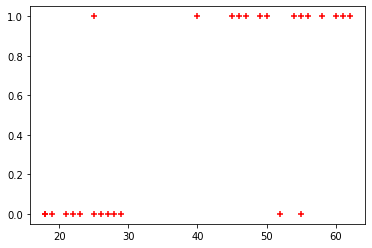

In [4]:
plt.scatter(df.age, df.bought_insurance, marker='+', color='red')

In [6]:
X = df.drop('bought_insurance', axis='columns').values.reshape(-1, 1)
X[:5]

array([[22],
       [25],
       [47],
       [52],
       [46]], dtype=int64)

In [7]:
y = df.bought_insurance.values
y[:5]

array([0, 0, 1, 0, 1], dtype=int64)

In [8]:
X.shape

(27, 1)

In [9]:
y.shape

(27,)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
y_pred = model.predict(X_test)

In [14]:
y_pred[:5]

array([1, 0, 1, 0, 0], dtype=int64)

In [15]:
model.predict_proba(X_test)
# the first value is prob for 0 and second value is prob for 1 for every sample of X_test

array([[0.11926354, 0.88073646],
       [0.95178274, 0.04821726],
       [0.04355309, 0.95644691],
       [0.95844557, 0.04155443],
       [0.92522499, 0.07477501],
       [0.90062385, 0.09937615]])

In [16]:
model.score(X_test, y_test)

0.8333333333333334

In [17]:
model.coef_
# this is bias

array([[0.15568883]])

In [18]:
model.intercept_
# these are weigths before passing to the activation sigmoid

array([-6.40777392])

In [43]:
import math
# z = m1x1+m2x2+ ..... + b
def sigmoid(z):
  return 1 / (1 + math.exp(-z))

In [20]:
y_train_pred = model.predict(X_train)
y_train_pred[:5]

array([1, 1, 1, 1, 1], dtype=int64)

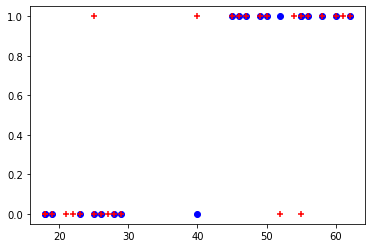

In [23]:
plt.scatter(X_train, y_train_pred, color='blue')
plt.scatter(df.age, df.bought_insurance, marker='+', color='red')